# The FIFA World Cup
The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. The current champion is Germany, which won its fourth title at the 2014 tournament in Brazil.

## Data - content 
The World Cups dataset show all information about all the World Cups in the history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline



In [3]:
#importing libraries
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
import os
#print(os.listdir("../input"))


# Data - Overview

In [4]:
matches  = pd.read_csv(r"C:\\Users\\barca\\Desktop\\Andrew NG\\A\\WorldCupMatches.csv")
players  = pd.read_csv(r"C:\\Users\\barca\\Desktop\\Andrew NG\\A\\WorldCupPlayers.csv")
cups     = pd.read_csv(r"C:\\Users\\barca\\Desktop\\Andrew NG\\A\\WorldCups.csv")
display("MATCHES - DATA")
display(matches.head(3))
display("PLAYERS - DATA")
display(players.head(3))
display("WORLD CUPS - DATA")
display(cups.head(3))

'MATCHES - DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


'PLAYERS - DATA'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


'WORLD CUPS - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


# Total attendence of world cups by year
* The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

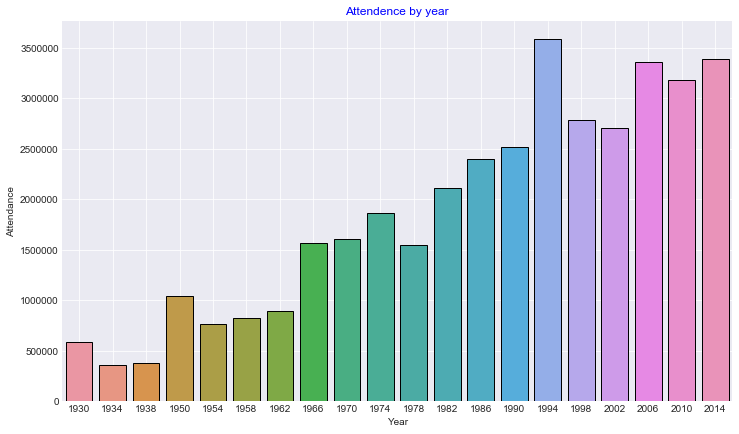

In [5]:
matches.isnull().sum()
sns.set_style("darkgrid")

#removing duplicate rows for match id column 
matches = matches.drop_duplicates(subset="MatchID",keep="first")

#remob=ving null values
matches = matches[matches["Year"].notnull()]

att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence by year",color='b')
plt.show()

# Average attendence by year
* A total of 3.43 million people watched the 64 games of the 2014 FIFA World Cup in Brazil live in the stadium. This meant that the average attendance per game was 53,758 , the highest average since the 1994 World Cup in the United States where average attendance is 68,991 per game. 

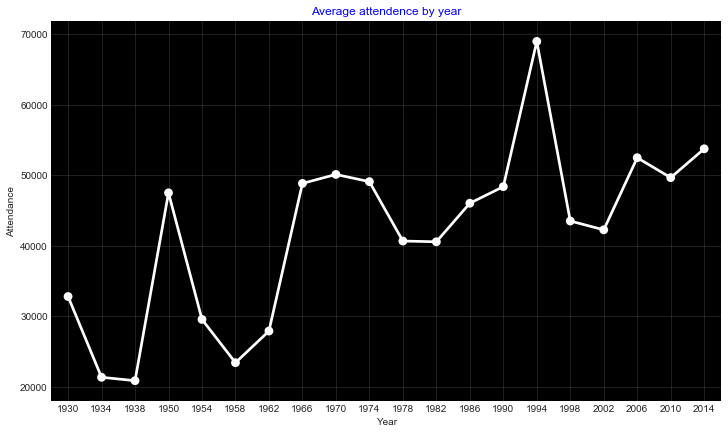

In [6]:
att1 = matches.groupby("Year")["Attendance"].mean().reset_index()
att1["Year"] = att1["Year"].astype(int)
plt.figure(figsize=(12,7))
ax = sns.pointplot(att1["Year"],att1["Attendance"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Average attendence by year",color='b')
plt.show()

# Total goals scored by year

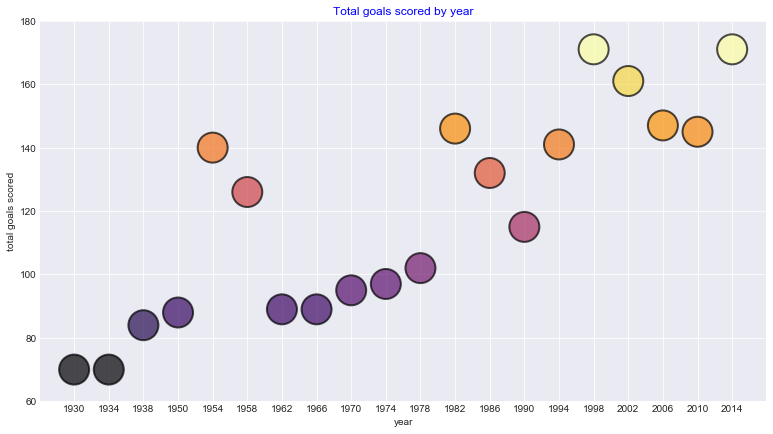

In [7]:
plt.figure(figsize=(13,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,
            c=cups["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

#plt.colorbar()
plt.xticks(cups["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()


# Total matches played and qualified teams  by year
* In the tournaments between 1934 and 1978, 16 teams competed in each tournament, except in 1938, when Austria was absorbed into Germany after qualifying, leaving the tournament with 15 teams, and in 1950, when India, Scotland, and Turkey withdrew, leaving the tournament with 13 teams
* The tournament was expanded to 24 teams in 1982, and then to 32 in 1998,also allowing more teams from Africa, Asia and North America to take part. 

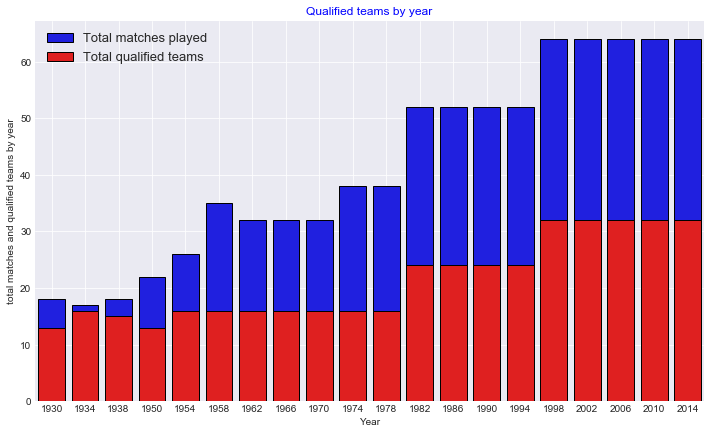

In [8]:
plt.figure(figsize=(12,7))
sns.barplot(cups["Year"],cups["MatchesPlayed"],linewidth=1,
            edgecolor="k"*len(cups),color="b",label="Total matches played")
sns.barplot(cups["Year"],cups["QualifiedTeams"],linewidth=1,
            edgecolor="k"*len(cups),color="r",label="Total qualified teams")
plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year",color='b')
plt.grid(True)
plt.ylabel("total matches and qualified teams by year")
plt.show()

# Matches with highest number of attendance

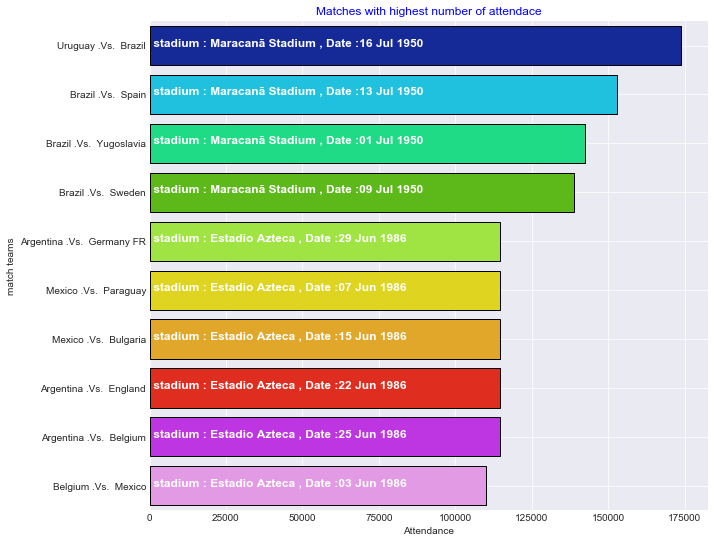

In [9]:
h_att = matches.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0]
h_att["mt"] = h_att["Home Team Name"] + " .Vs.  " + h_att["Away Team Name"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b')
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

# Stadiums with highest average attendance

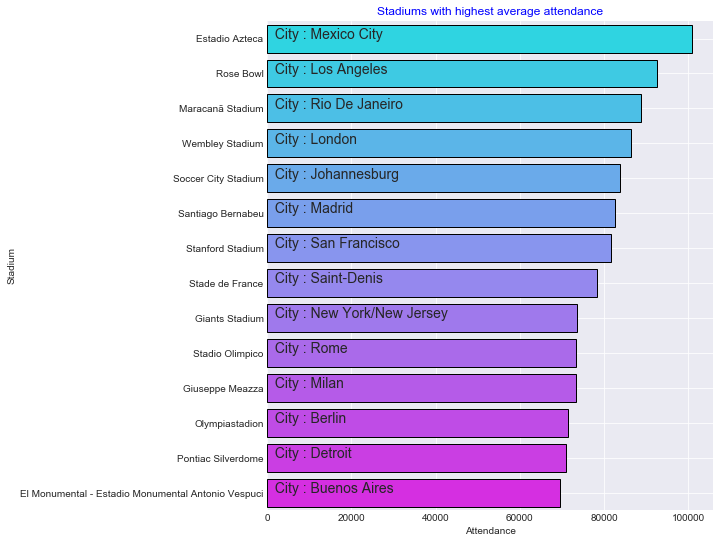

In [10]:
matches["Year"] = matches["Year"].astype(int)
matches["Datetime"] = matches["Datetime"].str.split("-").str[0]


matches["Stadium"] = matches["Stadium"].str.replace('Estadio do Maracana',"Maracanã Stadium")
matches["Stadium"] = matches["Stadium"].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
std  = matches.groupby(["Stadium","City"])["Attendance"].mean().reset_index().sort_values(by = "Attendance",ascending =False)


plt.figure(figsize=(8,9))
ax = sns.barplot(y = std["Stadium"][:14],x = std["Attendance"][:14],palette="cool",
                 linewidth=1,edgecolor = "k"*14)
plt.grid(True)

for i,j in enumerate("  City : " + std["City"][:14]):
    ax.text(.7,i,j,fontsize=14)

plt.title("Stadiums with highest average attendance",color='b')
plt.show()


# Cities that hosted highest world cup matches

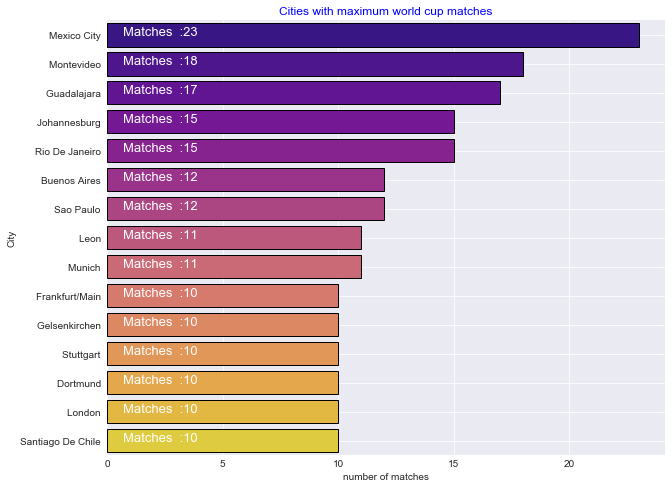

In [11]:
mat_c = matches["City"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c["index"][:15],x = mat_c["City"][:15],palette="plasma",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='b')

for i,j in enumerate("Matches  :" + mat_c["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 13,color="w")
plt.show()

# Average attendance by city

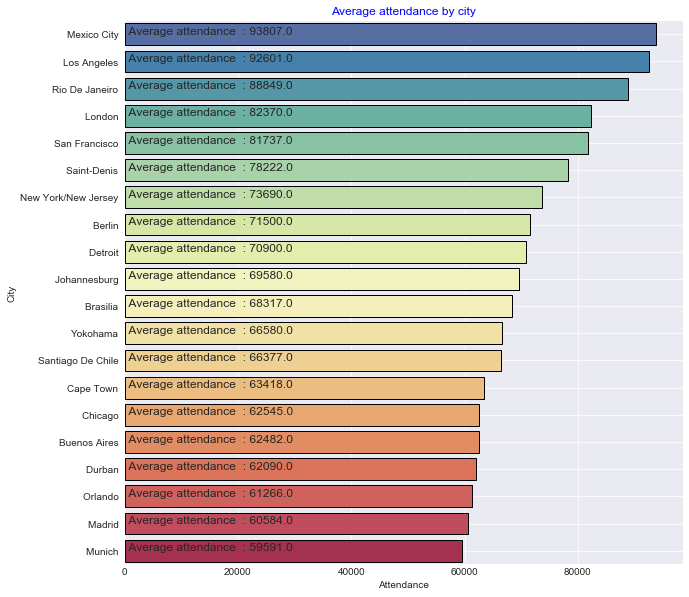

In [12]:
ct_at = matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance","City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = "k"*20,
            palette  = "Spectral_r")

for i,j in enumerate(" Average attendance  : "+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)
plt.grid(True)

plt.title("Average attendance by city",color='b')
plt.show()


# Teams with the most world cup final victories
* The 20 World Cup tournaments have been won by eight national teams. Brazil have won five times, and they are the only team to have played in every tournament. The other World Cup winners are Germany and Italy, with four titles each; Argentina and inaugural winner Uruguay, with two titles each; and England, France, and Spain, with one title each.

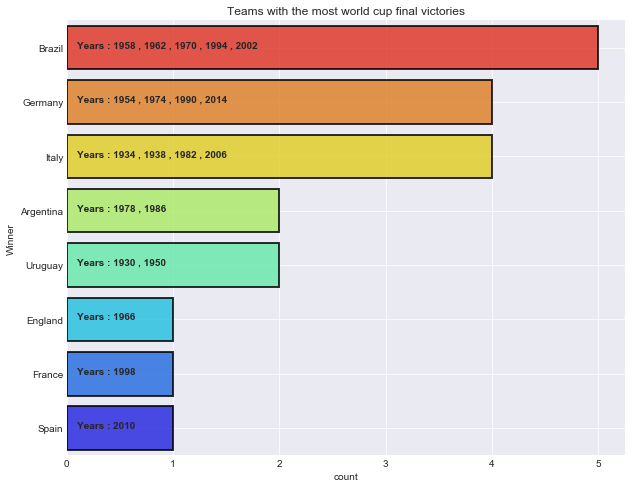

In [13]:
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

# World cup final results by nation

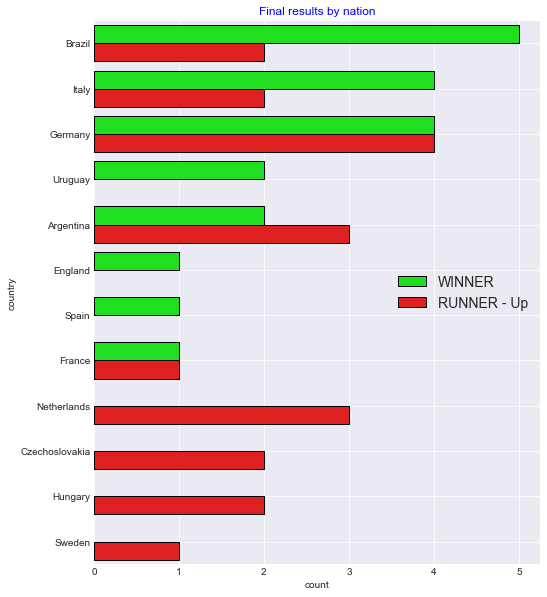

In [15]:
cou = cups["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(8,10))
sns.barplot("count","country",data=cou_t,
            hue="type",palette=["lime","r"],
            linewidth=1,edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='b')
plt.show()

# World cup final result for third and fourth place by nation

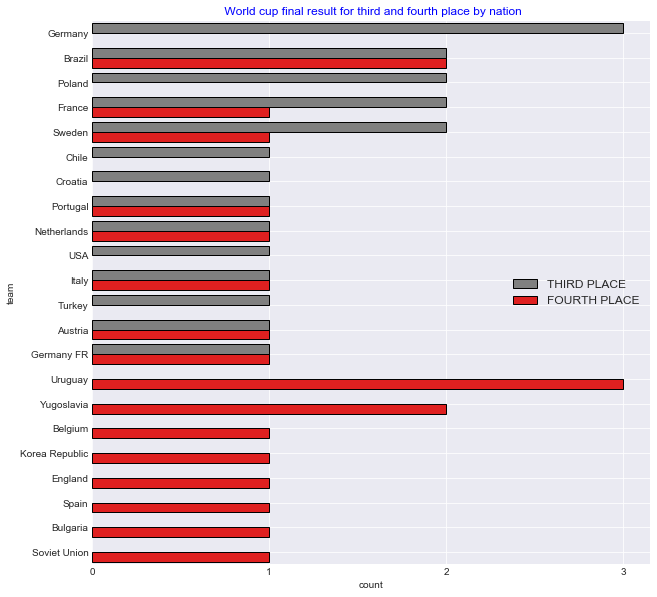

In [16]:
thrd = cups["Third"].value_counts().reset_index()
thrd.columns = ["team","count"]
thrd["type"] = "THIRD PLACE"

frth = cups["Fourth"].value_counts().reset_index()
frth.columns = ["team","count"]
frth["type"] = "FOURTH PLACE"

plcs = pd.concat([thrd,frth],axis=0)

plt.figure(figsize=(10,10))
sns.barplot("count","team",data=plcs,hue="type",
           linewidth=1,edgecolor="k"*len(plcs),
           palette = ["grey","r"])
plt.grid(True)
plt.xticks(np.arange(0,4,1))
plt.title(" World cup final result for third and fourth place by nation",color='b')
plt.legend(loc="center right",prop={"size":12})
plt.show()

# Teams with the most world cup matches

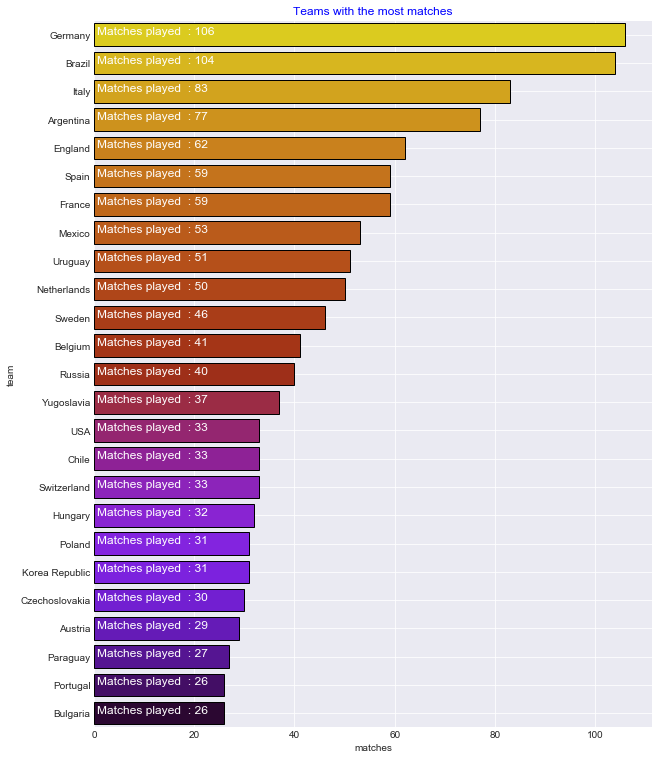

In [17]:
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Soviet Union","Russia")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Germany FR","Germany")

matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Germany FR","Germany")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Soviet Union","Russia")

ht = matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most matches",color='b')
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")

# Teams with the most tournament participations

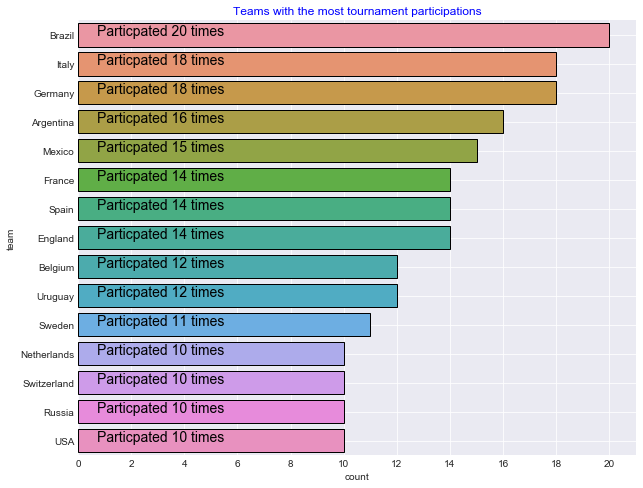

In [18]:
hy = matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],
                 linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k")
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='b')
plt.ylabel("team")
plt.xlabel("count")
plt.xticks(np.arange(0,22,2))
plt.show()

# Distribution of home and away goals

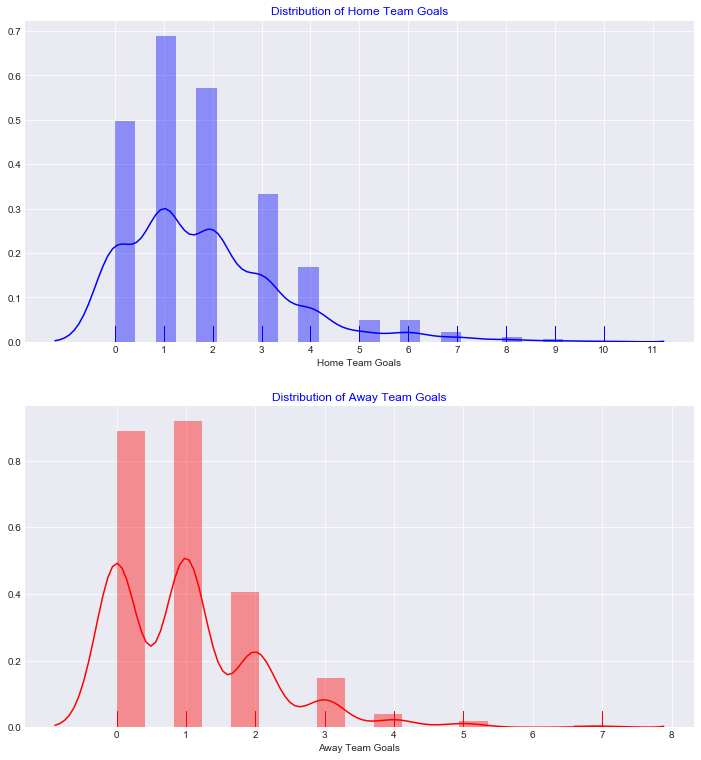

In [19]:
plt.figure(figsize=(12,13))
plt.subplot(211)
sns.distplot(matches["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Goals",color='b')


plt.subplot(212)
sns.distplot(matches["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Goals",color='b')
plt.show()

# Distribution of Half time Home and Away Team Goals

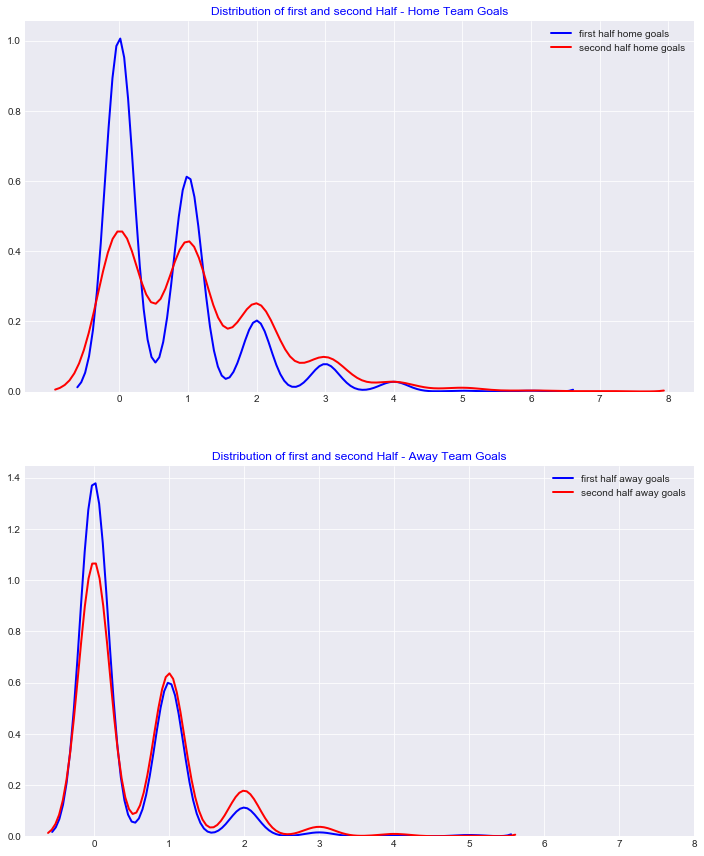

In [20]:
plt.figure(figsize=(12,15))
matches = matches.rename(columns={'Half-time Home Goals':"first half home goals",
                                  'Half-time Away Goals':"first half away goals"})

matches["second half home goals"] = matches["Home Team Goals"] - matches["first half home goals"]
matches["second half away goals"] = matches["Away Team Goals"] - matches["first half away goals"]

plt.subplot(211)
sns.kdeplot(matches["first half home goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half home goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Home Team Goals",color='b')

plt.subplot(212)
sns.kdeplot(matches["first half away goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half away goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Away Team Goals",color='b')
plt.show()

# Home and away goals by year

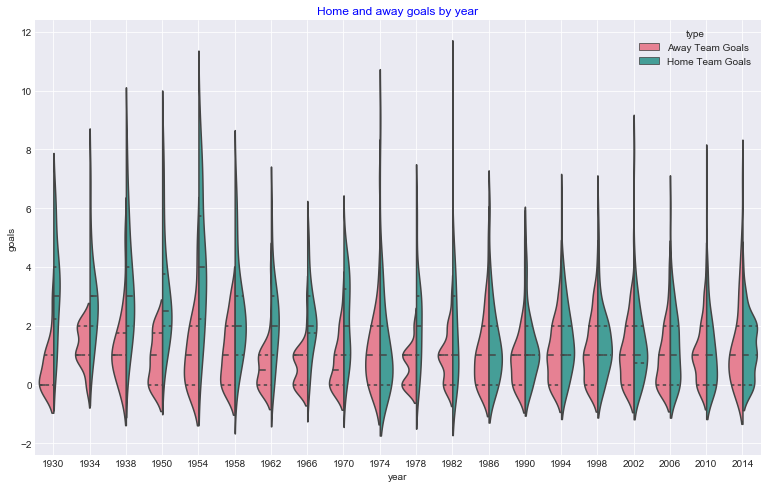

In [21]:
gh = matches[["Year","Home Team Goals"]]
gh.columns = ["year","goals"]
gh["type"] = "Home Team Goals"

ga = matches[["Year","Away Team Goals"]]
ga.columns = ["year","goals"]
ga["type"] = "Away Team Goals"

gls = pd.concat([ga,gh],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(gls["year"],gls["goals"],
               hue=gls["type"],split=True,inner="quart",palette="husl")
plt.grid(True)
plt.title("Home and away goals by year",color='b')
plt.show()

# First half home and away goals by year

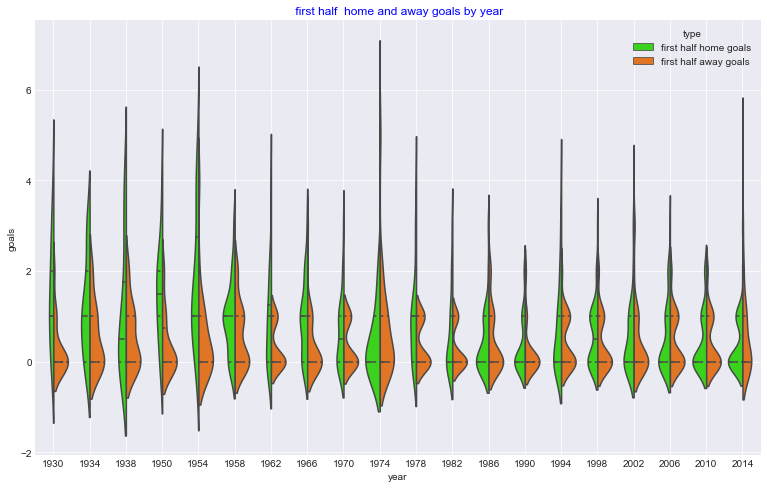

In [22]:
hhg = matches[["Year",'first half home goals']]
hhg.columns = ["year","goals"]
hhg["type"] = 'first half home goals'

hag = matches[["Year",'first half away goals']]
hag.columns = ["year","goals"]
hag["type"] = 'first half away goals'

h_time = pd.concat([hhg,hag],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(h_time["year"],h_time["goals"],
               hue=h_time["type"],
               split=True,inner="quart",
               palette="gist_ncar")
plt.grid(True)
plt.title(" first half  home and away goals by year",color='b')
plt.show()

# second half home and away goals by year

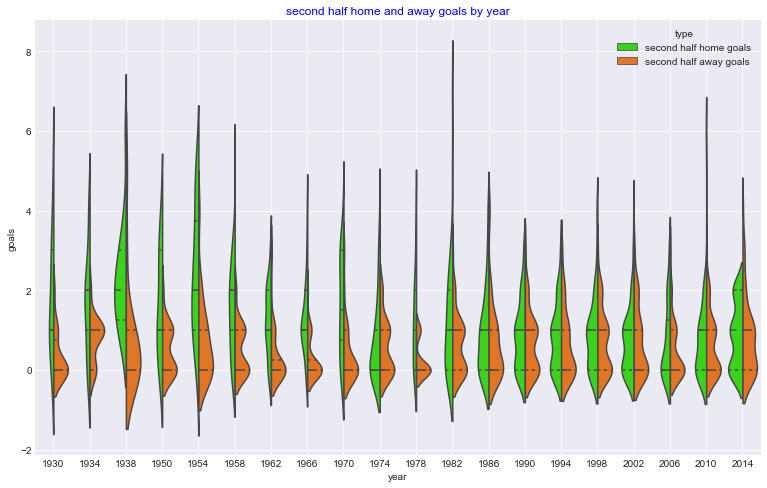

In [23]:
shg = matches[["Year",'second half home goals']]
shg.columns = ["year","goals"]
shg["type"] = 'second half home goals'

sag = matches[["Year",'second half away goals']]
sag.columns = ["year","goals"]
sag["type"] = 'second half away goals'

s_time = pd.concat([shg,sag],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(s_time["year"],s_time["goals"],
               hue=s_time["type"],
               split=True,inner="quart",
               palette="gist_ncar")
plt.title("second half home and away goals by year",color='b')
plt.grid(True)
plt.show()

# Match outcomes by home and away teams

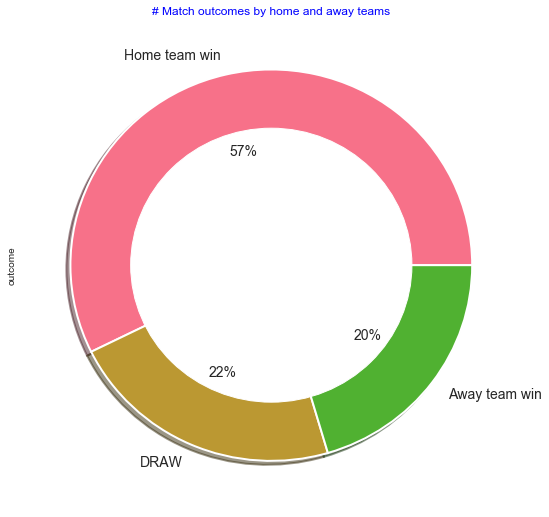

In [24]:
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)
plt.figure(figsize=(9,9))
matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("# Match outcomes by home and away teams",color='b')
plt.show()

In [27]:
matches[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',"outcome"]]


def win_label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
def lst_label(matches):
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
matches["win_team"]  = matches.apply(lambda matches:win_label(matches),axis=1)
matches["lost_team"] = matches.apply(lambda matches:lst_label(matches),axis=1)
lst = matches["lost_team"].value_counts().reset_index()
win = matches["win_team"].value_counts().reset_index()
wl  = win.merge(lst,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]


# Match outcomes by countries

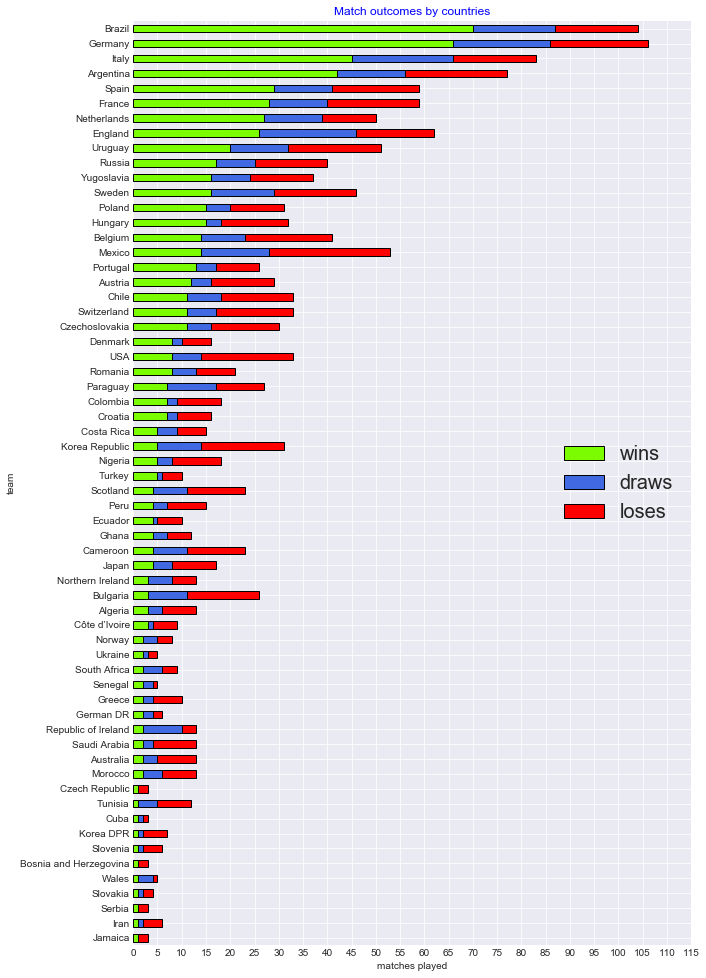

In [28]:
wl1 = wl.copy()
wl1 = wl1.merge(mt,left_on="team",right_on="team",how="left")
wl1["draws"] = wl1["matches"]-(wl1["wins"]+wl1["loses"])
wl1.index = wl1.team
wl1 = wl1.sort_values(by="wins",ascending=True)
wl1[["wins","draws","loses"]].plot(kind="barh",stacked=True,figsize=(10,17),
                                 colors=["lawngreen","royalblue","r"],
                                  linewidth=1,edgecolor="k"*len(wl1))
plt.legend(loc="center right",prop={"size":20})
plt.xticks(np.arange(0,120,5))
plt.title("Match outcomes by countries",color='b')
plt.xlabel("matches played")
plt.show()

## Countries with maximum wins , loses and draw matches in world cup

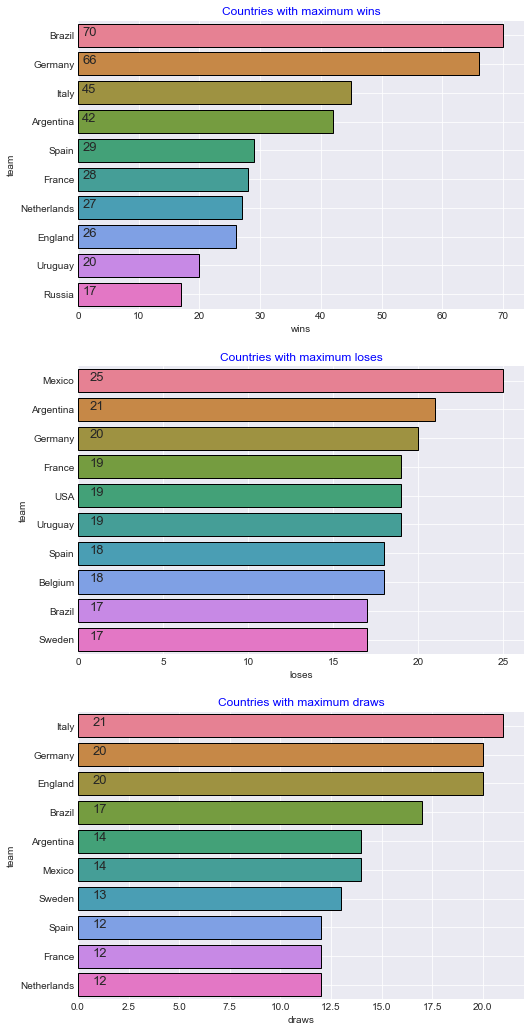

In [29]:
cols = [ 'wins', 'loses', 'draws']
length = len(cols)

plt.figure(figsize=(8,18))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(3,1,j+1)
    ax = sns.barplot(i,"team",data=wl1.sort_values(by=i,ascending=False)[:10],
                     linewidth=1,edgecolor="k"*10,palette="husl")
    for k,l in enumerate(wl1.sort_values(by=i,ascending=False)[:10][i]):
        ax.text(.7,k,l,fontsize=13)
    
    plt.grid(True)
    plt.title("Countries with maximum "+i,color='b')

# Teams with highest fifa world cup goals

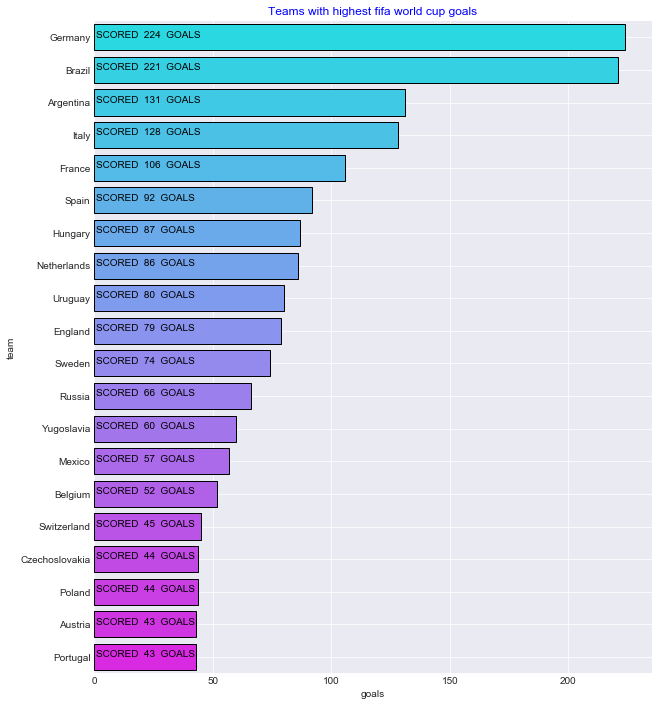

In [30]:
tt_gl_h = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(10,12))
ax= sns.barplot("goals","team",data=total_goals[:20],palette="cool",
                linewidth=1,edgecolor="k"*20)

for i,j in enumerate("SCORED  " +total_goals["goals"][:20].astype(str) + "  GOALS"):
    ax.text(.7,i,j,fontsize = 10,color="k")

plt.title("Teams with highest fifa world cup goals",color='b')
plt.grid(True)
plt.show()

# Highest total goals scored during a match 

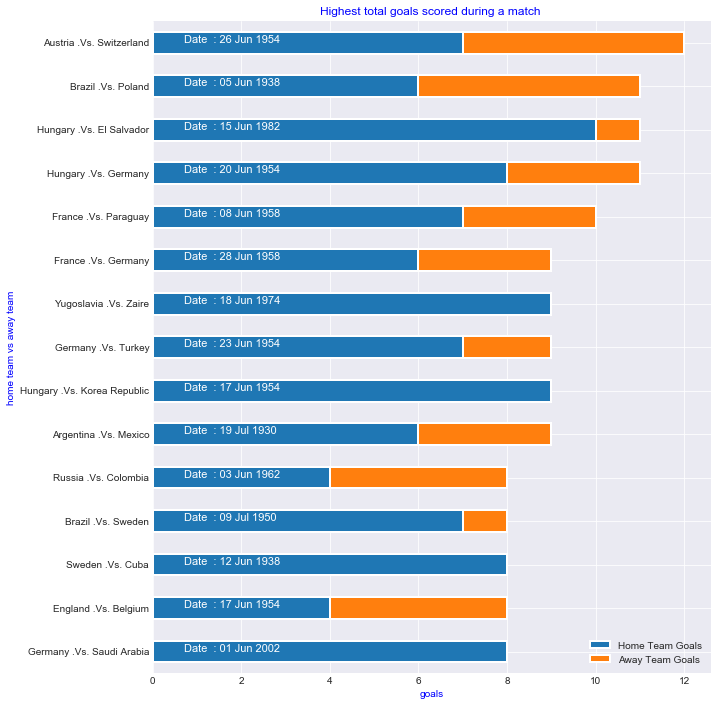

In [31]:
matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]
hig_gl = matches.sort_values(by="total_goals",ascending =False)[:15][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)
ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh",stacked=True,
                                                       figsize=(10,12),linewidth=2,
                                                       edgecolor="w"*15)

plt.ylabel("home team vs away team",color="b")
plt.xlabel("goals",color="b")
plt.title("Highest total goals scored during a match ",color='b')

for i,j in enumerate("Date  : " + hig_gl["Datetime"]):
    ax.text(.7,i,j,color="w",fontsize=11)
    
plt.show()

# Total goals scored during games by year

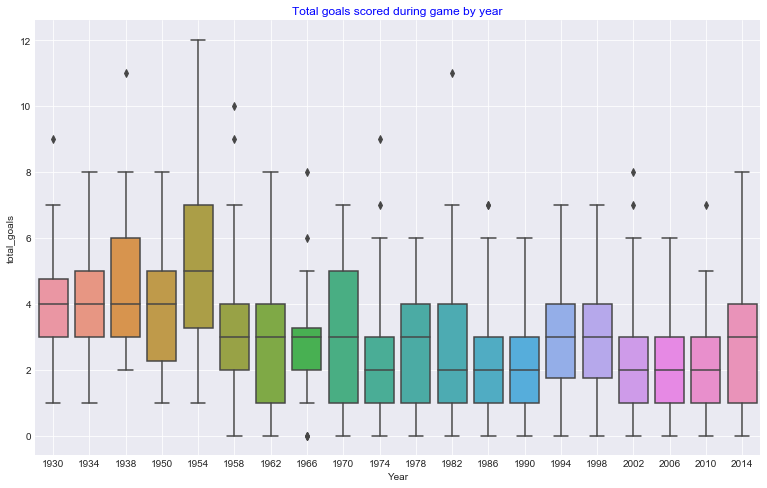

In [32]:
plt.figure(figsize=(13,8))
sns.boxplot(y=matches["total_goals"],
            x=matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year",color='b')
plt.show()


# Team comparator

In [33]:
#TEAM COMPARATOR
matches_played = mt.copy()
mat_new = matches_played.merge(lst,left_on="team",right_on="index",how="left")
mat_new = mat_new.merge(win,left_on="team",right_on="index",how="left")
mat_new = mat_new[["team","matches","lost_team","win_team"]]
mat_new = mat_new.fillna(0)
mat_new["win_team"] = mat_new["win_team"].astype(int)
mat_new["draws"]    = (mat_new["matches"]) - (mat_new["lost_team"] + mat_new["win_team"])
mat_new = mat_new.merge(total_goals,left_on="team",right_on="team",how="left")
mat_new = mat_new.rename(columns={"win_team":"wins","lost_team":"loses"})

def team_compare(team1,team2):
    
    lst = [team1,team2]
    dat = mat_new[mat_new["team"].isin(lst)]
    
    plt.figure(figsize=(12,10))
    cols   = ["matches","goals","wins","loses","draws"]
    length = len(cols)
    
    for i,j in itertools.zip_longest(cols,range(length)):
        
        fig = plt.subplot(3,2,j+1)
        ax  = sns.barplot(dat[i],dat["team"],palette=["royalblue","r"],
                         linewidth=2,edgecolor="k"*len(lst))
        plt.ylabel("")
        plt.yticks(fontsize=13)
        plt.grid(True,color="grey",alpha=.3)
        plt.title(i,color="b",fontsize=15)
        plt.subplots_adjust(wspace = .3,hspace =.5)
        fig.set_facecolor("w")
        
        for k,l in enumerate(dat[i].values):
            ax.text(.7,k,l,weight = "bold",fontsize = 20)
            

# Portugal & Argentina

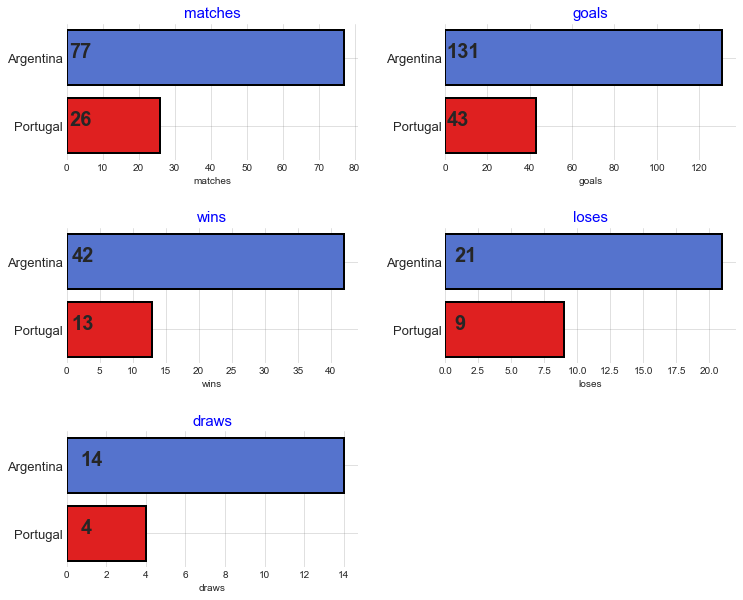

In [34]:
team_compare("Portugal","Argentina")

# France & Croatia

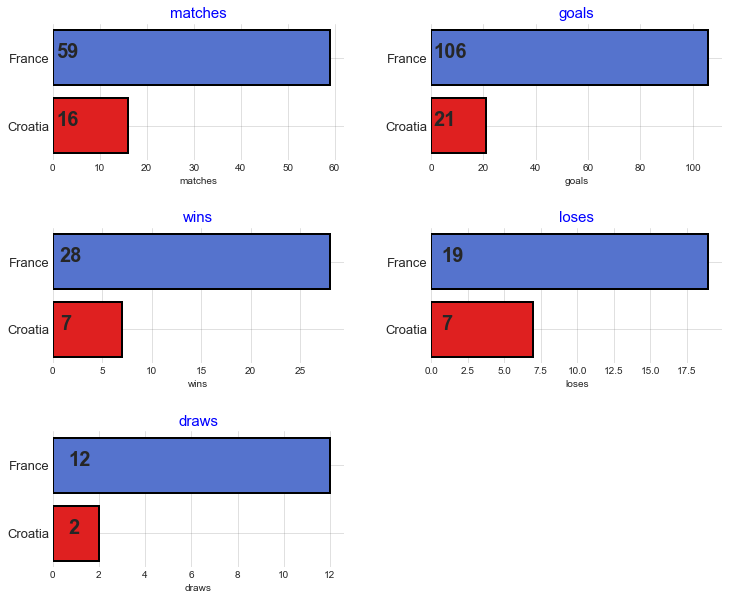

In [35]:
team_compare("France","Croatia")

# Spain & Italy

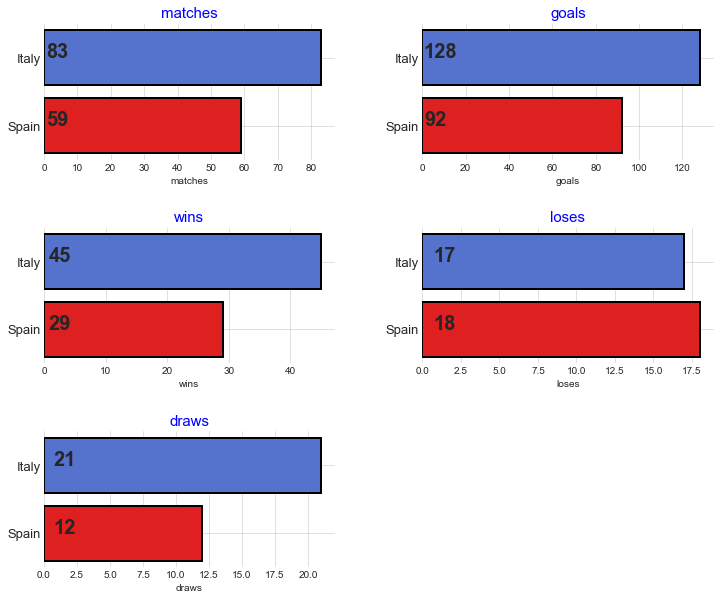

In [36]:
team_compare("Italy","Spain")

# Brazil & Germany

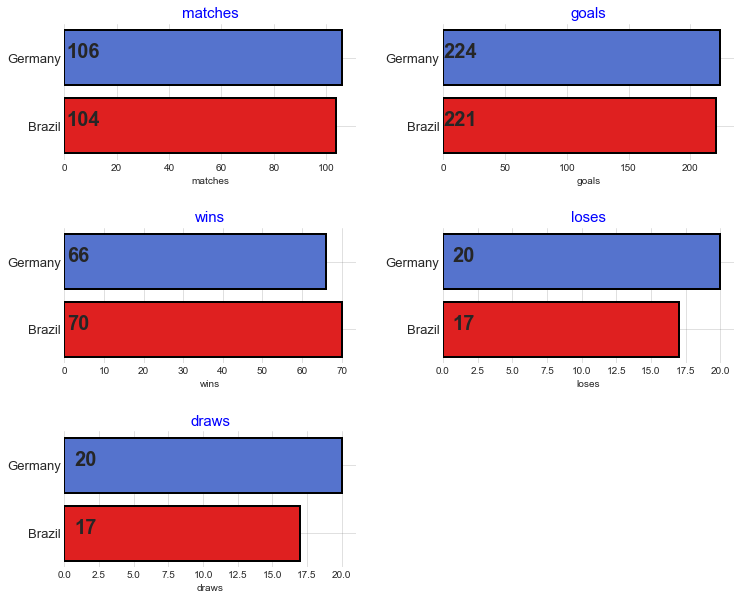

In [37]:
team_compare("Brazil","Germany")

# Referee's with most matches

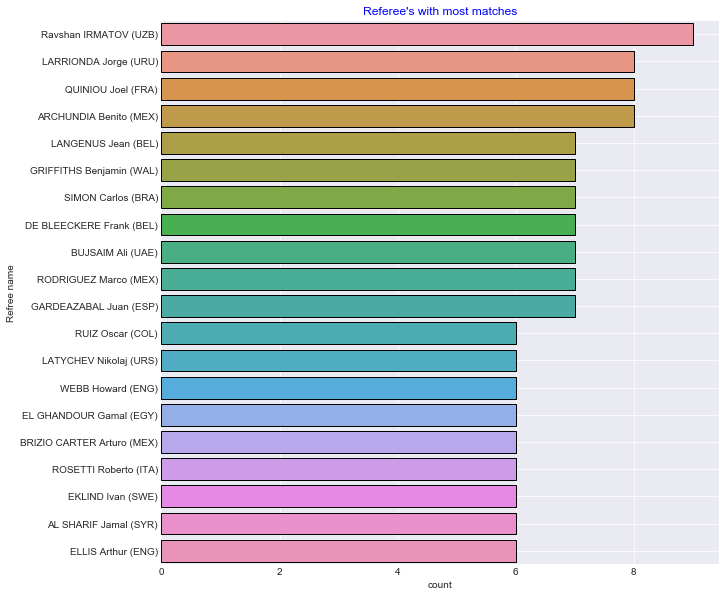

In [38]:
ref = matches["Referee"].value_counts().reset_index()
ref = ref.sort_values(by="Referee",ascending=False)

plt.figure(figsize=(10,10))
sns.barplot("Referee","index",data=ref[:20],linewidth=1,edgecolor="k"*20)
plt.xlabel("count")
plt.ylabel("Refree name")
plt.grid(True)
plt.title("Referee's with most matches",color='b')
plt.show()

# Goals per game by top countries 

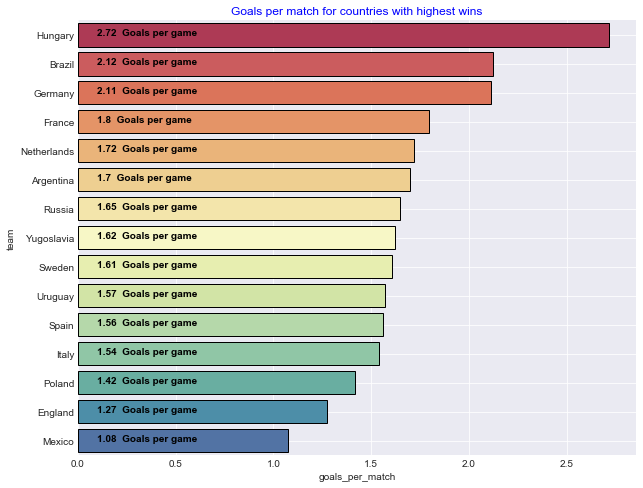

In [39]:
mat_new["goals_per_match"] = mat_new["goals"] / mat_new["matches"]
cou_lst = mat_new.sort_values(by="wins",ascending=False)[:15]["team"].tolist()
cou_gpm = mat_new[mat_new["team"].isin(cou_lst)]
cou_gpm = cou_gpm.sort_values(by="goals_per_match",ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot("goals_per_match","team",
                 linewidth=1,
                 edgecolor=["k"]*len(cou_gpm),
                 data=cou_gpm,
                 palette="Spectral")

for i,j in enumerate(np.round(cou_gpm["goals_per_match"],2).astype(str) + "  Goals per game"):
    ax.text(.1,i,j,color="k",weight = "bold")
    
plt.grid(True)
plt.title("Goals per match for countries with highest wins",color='b')
plt.show()

# Total Worldcup matches played in each country


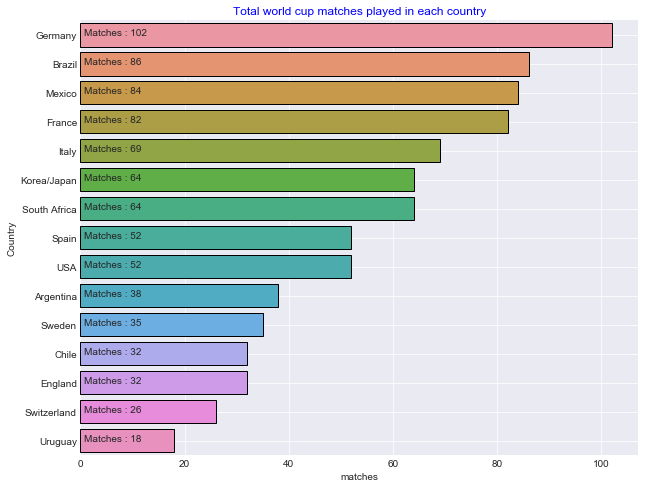

In [48]:
ysc = matches[["Year","Stadium","City","MatchID"]]
cy  = cups[["Year","Country"]]
ysc = ysc.merge(cy,left_on="Year",right_on="Year",how="left")
#ysc["Stadium"] = ysc["Stadium"].str.split(",").str[0]
ysc["std_cty"] = ysc["Stadium"] +" , "+ ysc["City"]

cnt_mat  =  ysc.groupby("Country")["MatchID"].nunique().reset_index()
cnt_mat  =  cnt_mat.sort_values(by= "MatchID",ascending=False)
cnt_mat


plt.figure(figsize=(10,8))

ax = sns.barplot("MatchID","Country",
                data=cnt_mat,
                linewidth=1,
                edgecolor="k"*cnt_mat["Country"].nunique())

for i,j in enumerate("Matches : " + cnt_mat["MatchID"].astype(str)):
    ax.text(.7 ,i,j)

plt.title("Total world cup matches played in each country",color='b')
plt.grid(True)
plt.xlabel("matches")
plt.show()

# Player names

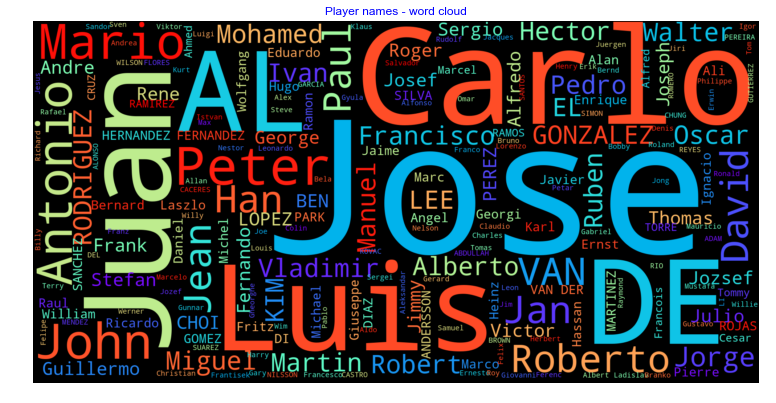

In [52]:
wrds = players["Player Name"].value_counts().keys()

wc = WordCloud(scale=5,max_words=1000,colormap="rainbow").generate(" ".join(wrds))
plt.figure(figsize=(13,14))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Player names - word cloud",color='b')
plt.show()

# Coach names

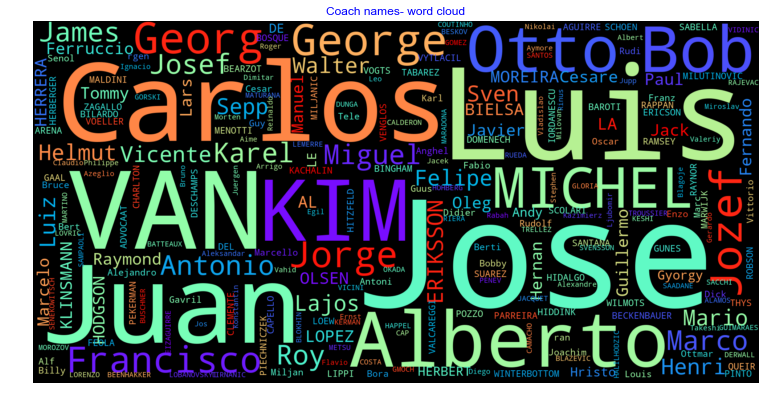

In [53]:
wrds1 = players["Coach Name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(13,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Coach names- word cloud",color='b')
plt.show()

# The Golden Goal  : 
* Golden goal or golden point is a rule used in association football, bandy, lacrosse, field hockey, ice hockey, floorball and korfball to decide the winner of a match (typically a knock-out match) in which scores are equal at the end of normal time. It is a type of sudden death.

* From the Round of 16 on, matches which are drawn after 90 minutes will go into extra time (2 x 15 minutes). The first team to score a goal in extra time will immediately be declared the winner. If there is no goal scored in 30 minutes of extra time, the match will be settled in the customary manner by a penalty shoot-out.

In [54]:
win_conditions = matches[matches["Win conditions"] != " "]
extra_time    = win_conditions[win_conditions["Win conditions"].str.contains("extra time")]
penalties     = win_conditions[win_conditions["Win conditions"].str.contains("penalties")]

gold_goal     = win_conditions[win_conditions["Win conditions"].str.contains("Golden Goal")]
gold_goal.index  = gold_goal["MatchID"].astype(int)

gg= gold_goal[["Datetime","Stage","Home Team Name",
              "Away Team Name","Home Team Goals",
              "Away Team Goals","first half home goals",
              "second half home goals","win_team","Win conditions"]].transpose()
gg.style.set_properties(**{"background-color":"black",
                           "color" : "white",
                           "border-color" : "lawngreen"}).set_caption("Matches with Golden Goals")

MatchID,43950051,43950056,43950060
Datetime,16 Jun 2002,18 Jun 2002,22 Jun 2002
Stage,Round of 16,Round of 16,Quarter-finals
Home Team Name,Sweden,Korea Republic,Senegal
Away Team Name,Senegal,Italy,Turkey
Home Team Goals,1,2,0
Away Team Goals,2,1,1
first half home goals,0,0,0
second half home goals,1,2,0
win_team,Senegal,Korea Republic,Turkey
Win conditions,Win on Golden Goal,Win on Golden Goal,Win on Golden Goal


# "Goals per game for countries playing in 2018 quarter finals

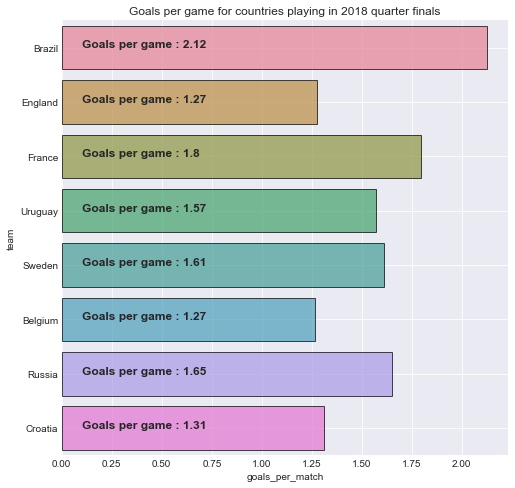

In [63]:
cou = ["Uruguay","France",
       "Brazil" , "Belgium",
       "Sweden" , "England",
       "Russia" , "Croatia" ]

qtr = mat_new[mat_new["team"].isin(cou)]

plt.figure(figsize=(8,8))
ax = sns.barplot(y="team",x="goals_per_match",
                data=qtr,
                linewidth=1,
                palette = "husl",
                alpha=.7,
                edgecolor = "k"*len(qtr))

for i,j in enumerate("Goals per game : " + np.around(qtr["goals_per_match"],2).astype(str)):
    ax.text(.1,i,j,weight = "bold" ,fontsize =12)
plt.grid(True)
plt.title("Goals per game for countries playing in 2018 quarter finals")
plt.show()

# Match outcomes for countries playing 2018 quarter finals

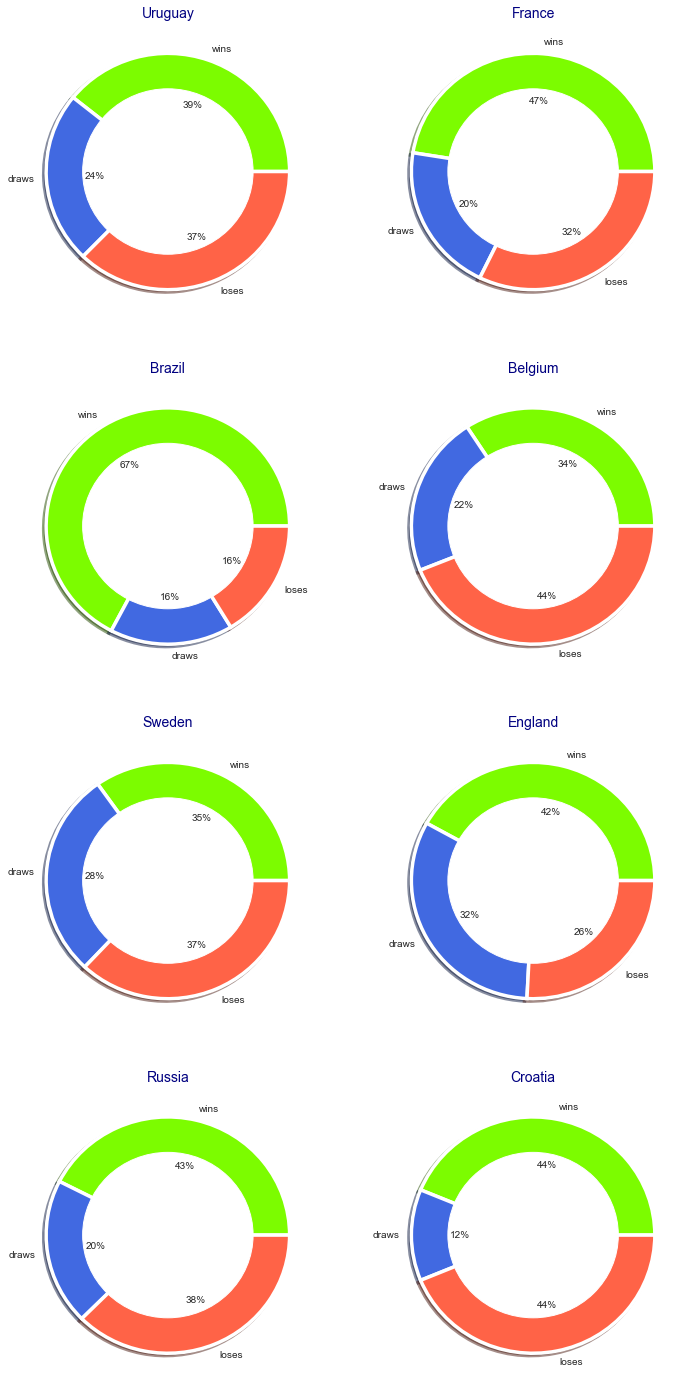

In [64]:
mat_new

cou = ["Uruguay","France",
       "Brazil" , "Belgium",
       "Sweden" , "England",
       "Russia" , "Croatia" ]

length = len(cou)

qtr = mat_new[mat_new["team"].isin(cou)]

plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(cou,range(length)) : 
    plt.subplot(4,2,j+1)
    
    lab = ["wins","draws","loses"]
    
    plt.pie(qtr[qtr["team"] == i][lab].values.ravel(),
            labels  = lab , 
            autopct = "%1.0f%%",
            shadow  = True,
            wedgeprops = {"linewidth":3.5,"edgecolor":"white"},
            colors  = ["lawngreen","royalblue","tomato"],)
    
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    
    plt.title(i,color="navy",fontsize=14)
    

# Team interactions comparator

In [65]:
#Team interactions comparator

def teams_performance(team1,team2):
    
    list_teams = [team1,team2]
    
    df_new = matches[(matches["Home Team Name"].isin(list_teams))]
    df_new = df_new[df_new["Away Team Name"].isin(list_teams)]
    
    print ("Total Matches       : ", df_new.shape[0])
    print ("Match Years         : ", df_new["Year"].unique().tolist())
    print ("Stadiums played     : ", df_new["Stadium"].unique().tolist(),"\n")
    print ("Match Cities        : ", df_new["City"].unique().tolist())
    print ("Average Attendance  : ", np.around(df_new["Attendance"].mean(),0) , "per game.")
    print ("Average total goals : ", np.around(df_new["total_goals"].mean(),2), "goals per game.")
    print ("-----")
    print ("WINS :") 
    print ("-----")
    print (df_new["win_team"].value_counts().to_string(header = False))

# Brazil - Germany

In [66]:
teams_performance("Germany","Brazil")

Total Matches       :  2
Match Years         :  [2002, 2014]
Stadiums played     :  ['International Stadium Yokohama', 'Estadio Mineirao'] 

Match Cities        :  ['Yokohama ', 'Belo Horizonte ']
Average Attendance  :  63585.0 per game.
Average total goals :  5.0 goals per game.
-----
WINS :
-----
Brazil     1
Germany    1


# Belgium - England

In [67]:
teams_performance("Belgium","England")

Total Matches       :  2
Match Years         :  [1954, 1990]
Stadiums played     :  ['St. Jakob', 'Renato Dall Ara'] 

Match Cities        :  ['Basel ', 'Bologna ']
Average Attendance  :  24260.0 per game.
Average total goals :  4.5 goals per game.
-----
WINS :
-----
DRAW       1
England    1


# Croatia - France

In [68]:
teams_performance("Croatia","France")

Total Matches       :  1
Match Years         :  [1998]
Stadiums played     :  ['Stade de France'] 

Match Cities        :  ['Saint-Denis ']
Average Attendance  :  76000.0 per game.
Average total goals :  3.0 goals per game.
-----
WINS :
-----
France    1
